# Initial Trials With The Data (Gaze Data)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#df = pd.read_table('Ankur02DataCleaned.txt')
#read the data into a dataframe
df = pd.read_table('Ankur02AllData.txt')

count = 0
timestamp = []
right_gaze_x = []
right_gaze_y = []

for num in range(len(df['TRIAL_LABEL'])):
    if (df['TRIAL_LABEL'][num] == 'Trial: 1'):
        count = count + 1
    
#df.iloc[0:81589].plot(df['TIMESTAMP'], df['RIGHT_GAZE_X'])
#df.iloc[0:81589].plot(df['TIMESTAMP'], df['RIGHT_GAZE_Y'])
#plt.show()

#test for just the first 500 values
for time in range(500):
    timestamp.append(df['TIMESTAMP'][time])
    right_gaze_x.append(df['RIGHT_GAZE_X'][time])
    right_gaze_y.append(df['RIGHT_GAZE_Y'][time])
    

#plot the right eye gaze x and y values
plt.plot(timestamp, right_gaze_x)
plt.plot(timestamp, right_gaze_y)
plt.show()
    

#more auxiliary testing
#df2 = pd.DataFrame({
    #'RIGHT_GAZE_X': df['RIGHT_GAZE_X'][0:81589],
    #'RIGHT_GAZE_Y': df['RIGHT_GAZE_Y'][0:81589]
#})
#df2.set_index(df['TIMESTAMP'][0:81589]).plot.line()

#plt.plot(df['AVERAGE_GAZE_X'][0:500], df['AVERAGE_GAZE_Y'][0:500])
#plt.show()

In [25]:
#clean up the dataframe so you can see all the headers
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

NameError: name 'df' is not defined

# More Testing With Head Targets

In [ ]:
#import numpy as np
#ascii_grid = np.loadtxt("Ankur02.asc")
from astropy.io import ascii
#import asc file from developers converter
dat = ascii.read('Ankur02.asc')
dat[0]

In [27]:
#read the data into a dataframe
import pandas as pd
df2 = pd.read_table('Ankur02.asc', dtype="string", names=["EDF_TIME", "1", "2", "3",
                                                         "4", "5", "6", "7", "8", "HTARGET_X", 
                                                          "HTARGET_Y", "HTARGET_DIST"])
df2

KeyboardInterrupt: 

In [10]:
#clean up the data frame
df2 = df2.apply(lambda x: x.str.strip() if x.dtype == "string" else x)

In [12]:
#get the time and head target/position values
timestamp = []
htarget_x = []
htarget_y = []
htarget_dist = []

for htarget in range(500):
    
    timestamp.append(df2['EDF_TIME'][htarget])
    htarget_x.append(df2['HTARGET_X'][htarget])
    htarget_y.append(df2['HTARGET_Y'][htarget])
    htarget_dist.append(df2['HTARGET_DIST'][htarget])

['3298.0', '3298.0', '3298.0', '3298.0', '3298.0', '3298.0', '3298.0', '3298.0', '3298.0', '3298.0', '3298.0', '3299.0', '3298.0', '3299.0', '3299.0', '3299.0', '3299.0', '3299.0', '3299.0', '3299.0', '3299.0', '3299.0', '3299.0', '3299.0', '3299.0', '3300.0', '3300.0', '3300.0', '3300.0', '3300.0', '3300.0', '3300.0', '3300.0', '3300.0', '3300.0', '3300.0', '3300.0', '3301.0', '3301.0', '3301.0', '3301.0', '3301.0', '3301.0', '3301.0', '3301.0', '3301.0', '3301.0', '3301.0', '3301.0', '3302.0', '3302.0', '3302.0', '3302.0', '3302.0', '3302.0', '3302.0', '3302.0', '3302.0', '3302.0', '3303.0', '3302.0', '3303.0', '3303.0', '3303.0', '3303.0', '3303.0', '3303.0', '3303.0', '3303.0', '3303.0', '3303.0', '3303.0', '3303.0', '3303.0', '3303.0', '3304.0', '3304.0', '3304.0', '3304.0', '3304.0', '3304.0', '3304.0', '3304.0', '3304.0', '3304.0', '3304.0', '3304.0', '3304.0', '3304.0', '3305.0', '3304.0', '3305.0', '3305.0', '3304.0', '3305.0', '3305.0', '3305.0', '3305.0', '3305.0', '3305.0',

In [19]:
#clean the head target data
htarget_dist_clean = [x[0:5] for x in htarget_dist]
print(htarget_dist_clean)

TypeError: float() argument must be a string or a number, not 'list'

In [25]:
#more cleaning of head target data
htarget_dist_clean = [float(i) for i in htarget_dist_clean]
htarget_x_clean = [float(i) for i in htarget_x]
htarget_y_clean = [float(i) for i in htarget_y]

In [5]:
#plot the head targets of x and y positions
import matplotlib.pyplot as plt
plt.plot(timestamp, htarget_x)
plt.plot(timestamp, htarget_y)
plt.show()

NameError: name 'timestamp' is not defined

# Stimuli and Target Tracking Processing (for SmoothPurSustained_1)

In [2]:
import pandas as pd
#read the partially cleaned Excel data into a Pandas dataframe
df3 = pd.read_excel('TestTargetValues.xlsx')
print(df3)

           Message  Desc  TargPos                        Targ1    TargX  \
0              NaN   NaN      NaN                          NaN      NaN   
1        \t4303687  !CMD        0  select_parser_configuration        0   
2              NaN   NaN      NaN                          NaN      NaN   
3        \t4303693  !CMD        0    auto_calibration_messages        =   
4              NaN   NaN      NaN                          NaN      NaN   
...            ...   ...      ...                          ...      ...   
1048569    5497344    \t  393.3\t                      534.2\t  985.0\t   
1048570        NaN   NaN      NaN                          NaN      NaN   
1048571    5497345    \t  393.9\t                      534.3\t  985.0\t   
1048572        NaN   NaN      NaN                          NaN      NaN   
1048573    5497346    \t  394.4\t                      534.4\t  985.0\t   

           TargY    TargZ Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10  \
0            NaN      NaN

In [5]:
#generate empty lists for tracking variables
timestamp_new = [] #EDF time
target_x = [] #x-target position
target_y = [] #y-target position
right_x = [] #right eye x position
right_y = [] #right eye y position
left_y = [] #left eye y position (x is in a variable defined later)

#run through the range of timestamps that have target position values
for target in range(1039785, 1048552, 2):
    #see the Excel file for column names
    timestamp_new.append(df3['Message'][target])
    right_x.append(df3["TargPos"][target])
    right_y.append(df3["Targ1"][target])
    target_x.append(df3["TargX"][target])
    target_y.append(df3["TargY"][target])
    left_y.append(df3["TargZ"][target])
    

In [7]:
import math
#clean the right eye x position values
right_x_clean = [x for x in right_x if not isinstance(x, int)] #gets rid of strings
right_x_clean = [float(i) for i in right_x_clean] #turns into floats
right_x_clean = [x for x in right_x_clean if not(math.isnan(x) == True)] #gets rid NaN
print(right_x_clean)

[971.6, 971.9, 972.2, 972.6, 972.9, 973.2, 973.5, 973.8, 973.8, 973.9, 973.9, 973.9, 973.9, 973.9, 973.9, 973.9, 973.9, 974.0, 974.0, 974.0, 973.8, 973.6, 973.4, 973.1, 972.9, 972.7, 972.5, 972.4, 972.3, 972.3, 972.0, 971.7, 971.4, 971.3, 971.2, 971.1, 971.3, 971.6, 972.1, 972.7, 973.1, 973.5, 974.0, 974.2, 974.5, 974.7, 974.8, 974.4, 974.0, 973.5, 973.1, 972.6, 972.1, 971.6, 971.5, 971.4, 971.4, 971.3, 971.3, 971.3, 971.3, 971.4, 971.5, 971.6, 972.0, 972.3, 972.5, 972.8, 973.0, 973.4, 973.7, 973.9, 974.0, 974.1, 974.2, 973.9, 973.6, 973.2, 972.7, 972.1, 971.5, 971.0, 970.7, 970.5, 970.3, 970.2, 970.2, 970.2, 970.2, 970.3, 970.3, 970.4, 970.4, 970.7, 971.0, 971.4, 971.7, 972.0, 972.3, 972.6, 972.7, 972.7, 972.7, 973.0, 973.3, 973.6, 973.7, 973.8, 973.6, 973.5, 973.1, 972.7, 972.3, 972.1, 972.2, 972.4, 972.6, 972.9, 973.2, 973.5, 973.8, 974.0, 974.3, 974.5, 974.6, 974.7, 974.7, 974.7, 974.7, 974.7, 974.6, 974.5, 974.4, 974.3, 974.3, 974.2, 974.2, 974.2, 974.2, 974.2, 974.2, 974.2, 974.2

In [8]:
right_y_clean = [y for y in right_y if not isinstance(y, int)] #gets rid of strings
right_y_clean = [float(i) for i in right_y_clean] #turns into floats
right_y_clean = [y for y in right_y_clean if not(math.isnan(y) == True)] #gets rid of NaN
print(right_y_clean)

[532.4, 532.3, 532.0, 531.8, 531.5, 531.0, 530.7, 530.4, 530.3, 530.4, 530.5, 530.7, 531.0, 531.3, 531.5, 531.5, 531.3, 530.8, 530.3, 529.8, 529.1, 528.4, 527.7, 527.2, 527.0, 526.7, 526.5, 526.5, 526.5, 526.6, 526.6, 526.8, 526.9, 527.0, 527.1, 527.1, 527.1, 527.0, 527.0, 527.0, 527.0, 527.0, 527.2, 527.3, 527.3, 527.1, 526.8, 526.5, 526.2, 525.9, 525.6, 525.3, 525.0, 525.0, 524.9, 524.9, 525.1, 525.3, 525.5, 526.1, 526.7, 527.2, 527.8, 528.1, 528.4, 528.7, 528.7, 528.7, 528.7, 528.7, 528.7, 528.6, 528.5, 528.4, 528.3, 528.2, 528.0, 528.0, 527.9, 527.8, 527.6, 527.5, 527.4, 527.4, 527.3, 527.2, 527.2, 527.2, 527.2, 527.2, 527.4, 527.8, 528.3, 528.8, 529.3, 529.8, 530.2, 530.4, 530.4, 530.1, 529.7, 529.3, 529.0, 528.7, 528.5, 528.3, 528.3, 528.5, 528.7, 529.0, 529.9, 530.7, 531.9, 533.1, 534.4, 535.8, 537.2, 538.1, 538.9, 539.3, 539.8, 540.1, 540.4, 540.4, 540.5, 540.6, 540.6, 540.7, 540.7, 540.6, 540.5, 540.4, 540.4, 540.4, 540.4, 540.4, 540.5, 540.6, 540.7, 540.8, 540.8, 540.7, 540.5

In [9]:
#equalize the list sizes (shorten by 57 in this case)
for right_clean in range(0, 57):
    right_x_clean.pop(right_clean)
    right_y_clean.pop(right_clean)

In [36]:
#check the sizes
print(len(right_x_clean))
print(len(right_y_clean))

3961
3961


In [37]:
#clean the left eye x position values
left_x_clean = [y for y in target_y if not isinstance(y, int)] #gets rid of strings
left_x_clean = [float(i) for i in left_x_clean] #turns into floats
left_x_clean = [y for y in left_x_clean if not(math.isnan(y) == True)] #gets rid of NaN
print(left_x_clean)

[965.5, 965.6, 965.7, 966.0, 966.2, 966.5, 966.8, 967.1, 967.3, 967.5, 967.6, 967.3, 967.1, 966.8, 966.5, 966.4, 966.5, 966.5, 966.9, 967.3, 967.7, 968.0, 968.1, 968.1, 968.0, 967.9, 967.8, 967.7, 967.5, 967.5, 967.7, 967.9, 968.1, 968.4, 968.6, 968.8, 968.9, 968.9, 968.9, 968.8, 968.8, 968.7, 968.7, 968.7, 968.6, 968.5, 968.4, 968.4, 968.3, 968.3, 968.3, 968.3, 968.3, 968.3, 968.2, 968.1, 967.9, 967.8, 967.7, 967.7, 967.7, 967.9, 968.2, 968.5, 968.7, 968.8, 969.0, 969.1, 969.2, 969.3, 969.3, 969.5, 969.6, 969.7, 969.8, 969.9, 969.9, 970.0, 970.0, 970.0, 970.0, 970.0, 969.9, 969.8, 969.7, 969.4, 969.2, 969.0, 968.6, 968.3, 967.9, 967.8, 967.8, 967.8, 967.7, 967.8, 967.9, 967.9, 967.8, 967.7, 967.5, 967.4, 967.4, 967.3, 967.4, 967.4, 967.5, 967.5, 967.4, 967.3, 967.3, 967.1, 967.0, 967.0, 967.4, 967.8, 968.2, 968.5, 968.9, 969.0, 969.1, 969.0, 968.9, 968.9, 968.8, 968.7, 968.8, 968.9, 968.8, 968.7, 968.6, 968.5, 968.4, 968.2, 968.0, 967.9, 967.7, 967.6, 967.5, 967.3, 967.2, 967.1, 967.1

In [38]:
#clean the left eye y position values
left_y_clean = [z for z in left_y if not isinstance(z, int)] #gets rid of strings
left_y_clean = [float(i) for i in left_y_clean] #turns into floats
left_y_clean = [z for z in left_y_clean if not(math.isnan(z) == True)] #gets rid of NaN
left_y_clean = [z for z in left_y_clean if not(z < 300)] #gets rid of misreads
print(left_y_clean)

[542.7, 542.5, 542.5, 542.5, 542.5, 542.0, 541.7, 541.2, 540.6, 539.9, 539.2, 538.7, 538.4, 538.1, 537.7, 537.3, 536.9, 536.4, 535.9, 535.0, 534.2, 533.7, 533.3, 532.9, 532.5, 532.1, 532.1, 532.2, 532.1, 532.0, 531.9, 531.8, 531.7, 531.8, 531.9, 532.1, 532.3, 532.6, 532.8, 533.0, 533.0, 533.1, 533.2, 533.2, 533.6, 534.1, 534.5, 534.7, 534.9, 535.0, 535.1, 534.8, 534.6, 534.6, 534.9, 535.1, 535.4, 535.8, 536.0, 536.3, 536.5, 536.7, 536.9, 537.1, 537.2, 537.3, 537.3, 537.1, 536.8, 536.6, 536.4, 536.3, 536.2, 536.6, 536.9, 537.4, 537.8, 538.2, 538.5, 538.9, 538.8, 538.7, 538.9, 539.0, 539.1, 539.5, 539.8, 540.2, 541.1, 541.7, 542.3, 542.8, 543.2, 543.6, 543.9, 543.8, 543.6, 543.7, 543.8, 544.0, 544.1, 544.5, 545.0, 545.5, 546.0, 546.6, 547.2, 547.9, 548.8, 549.4, 550.0, 550.5, 550.8, 551.1, 551.3, 551.1, 550.8, 550.5, 550.2, 550.0, 549.8, 549.6, 549.7, 549.8, 550.0, 550.1, 550.2, 550.2, 550.2, 550.0, 549.8, 549.5, 549.3, 549.0, 548.6, 548.3, 548.0, 547.8, 547.5, 547.3, 547.2, 547.2, 547.2

In [39]:
#check sizes
print(len(left_y_clean))

3961


In [40]:
#clean the timestamp values
no_string_time = [x for x in timestamp_new if not isinstance(x, str)] #gets rid of non-strings
real_time = [x for x in no_string_time if not (math.isnan(x) == True)] #gets rid of NaN
print(len(real_time))

4031


In [41]:
#equalize the sizing of the time stamps(3961 for all in this case / 70 removed here)
time_clean = real_time
for clean in range(0, 70):
    time_clean.pop(clean)

In [42]:
#check sizes
print(len(time_clean))

3961


In [26]:
#gets the clean values for the x position stimuli targets
no_string_targx = [x for x in target_x if not isinstance(x, str)] #gets rid of non-strings
no_nan_targx = [x for x in no_string_targx if not(math.isnan(x) == True)] #gets rid of NaN
print(no_nan_targx)

[960, 973, 986, 999, 1012, 1025, 1038, 1051, 1064, 1077, 1090, 1103, 1116, 1129, 1141, 1154, 1166, 1179, 1191, 1203, 1215, 1227, 1239, 1251, 1263, 1274, 1285, 1297, 1308, 1318, 1329, 1340, 1350, 1360, 1371, 1380, 1390, 1400, 1409, 1418, 1427, 1436, 1444, 1452, 1461, 1468, 1476, 1483, 1491, 1498, 1504, 1511, 1517, 1523, 1529, 1534, 1539, 1544, 1549, 1554, 1558, 1562, 1565, 1569, 1572, 1575, 1577, 1580, 1582, 1584, 1585, 1586, 1587, 1588, 1588, 1588, 1588, 1588, 1587, 1586, 1585, 1584, 1582, 1580, 1577, 1575, 1572, 1569, 1565, 1562, 1558, 1553, 1549, 1544, 1539, 1534, 1529, 1523, 1517, 1511, 1504, 1497, 1491, 1483, 1476, 1468, 1460, 1452, 1444, 1436, 1427, 1418, 1409, 1400, 1390, 1380, 1370, 1360, 1350, 1340, 1329, 1318, 1308, 1296, 1285, 1274, 1262, 1251, 1239, 1227, 1215, 1203, 1191, 1179, 1166, 1154, 1141, 1129, 1116, 1103, 1090, 1077, 1064, 1051, 1038, 1025, 1012, 999, 986, 973, 959, 946, 933, 920, 907, 894, 881, 868, 855, 842, 829, 816, 803, 790, 778, 765, 753, 740, 728, 716, 704, 6

In [27]:
#gets the clean values for the y position stimuli targets
no_string_targy = [y for y in target_y if not isinstance(y, str)] #gets rid of non-strings
no_nan_targy = [y for y in no_string_targy if not(math.isnan(y) == True)] #gets rid of NaN
print(no_nan_targy)

[540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540,

In [28]:
import matplotlib.pyplot as plt

In [29]:
#create a new time scale so that you can fit different sampling rates
#targets outputted only around once per 16 regular frames
intermediate_time = []
#find the correct time range in the data
for x in range(5493286, 5497335, 16):
    intermediate_time.append(x)

In [30]:
#equalize time sizes
for popit in range(0, 10):
    intermediate_time.pop(popit)

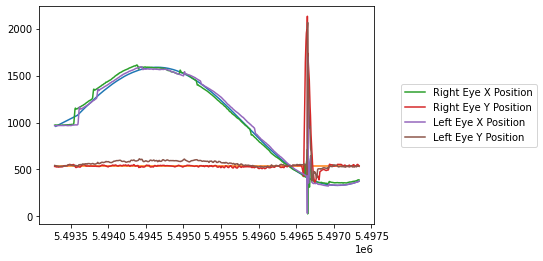

In [55]:
#plot the target stimuli and tracking
#appears to be a misread by the giant spike
plt.plot(intermediate_time, no_nan_targx) #plot the x target position
plt.plot(intermediate_time, no_nan_targy) #plot the y target position
plt.plot(time_clean, right_x_clean, label='Right Eye X Position') #plot the right eye x position
plt.plot(time_clean, right_y_clean, label='Right Eye Y Position') #plot the right eye y position
plt.plot(time_clean, left_x_clean, label='Left Eye X Position') #plot the left eye x position
plt.plot(time_clean, left_y_clean, label='Left Eye Y Position') #plot the left eye y position
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.show()

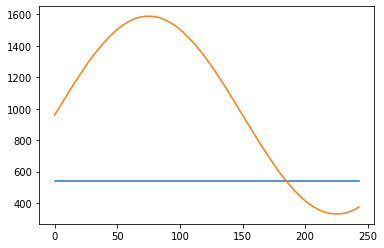

In [35]:
#what the target in theory should look like
plt.plot(no_nan_targy)
plt.plot(no_nan_targx)
plt.show()